In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the JSON data
with open("nes_results_dense_100k.json", "r") as f:
    results_data = json.load(f)

# Convert to a DataFrame
data = pd.DataFrame(results_data)
data.head()


,Population,Dimension,Generation,Error,Time (s),Errors,Parameters History,Convergence
0,50,2,1000,0.347084,3.795704,"[2.249635696411133, 2.2062602043151855, 2.1881...","[[-1.5938059091567993, -0.8422523140907288], [...","[-1150.837646484375, -1011.1028442382812, -956..."
1,500,2,1000,0.224100,3.579340,"[1.9235550165176392, 1.534165859222412, 1.3691...","[[-1.1259338855743408, -0.6972131729125977], [...","[-390.61865234375, -70.66976165771484, -26.315..."
2,50,5,1000,1.349574,3.625156,"[2.0405361652374268, 2.024683713912964, 2.0182...","[[-0.12921005487442017, -1.5964970588684082, 2...","[-4166.705078125, -3876.093505859375, -3765.74..."
3,500,5,1000,0.493488,3.642197,"[1.9155609607696533, 1.7481601238250732, 1.672...","[[-0.12103760987520218, -1.5320369005203247, 1...","[-2206.860595703125, -949.910400390625, -680.3..."
4,50,10,1000,2.102455,3.632559,"[1.3497326374053955, 1.3389242887496948, 1.334...","[[-0.6994692087173462, -1.13315749168396, 1.01...","[-986.3163452148438, -909.9304809570312, -884...."


In [27]:
# Extract unique dimensions and populations
dims, pops = data['Dimension'].unique(), data['Population'].unique()

# Initialize dictionaries to store convergence and error data
convergence_data = {}
error_data = {}

# Populate the convergence and error dictionaries
for dim in dims:
    for pop in pops:
        subset = data[(data['Dimension'] == dim) & (data['Population'] == pop)]
        convergence_data[(dim, pop)] = subset['Convergence'].values[0]  # No need for .tolist() since it's already a list
        error_data[(dim, pop)] = subset['Errors'].values[0]             # No need for .tolist() since it's already a list

# Check the first 10 values to verify the content
for (dim, pop), convergence in convergence_data.items():
    print(f"Dim: {dim}, Pop: {pop}, Convergence Data: {convergence[:10]}")  # Print first 10 values


Dim: 2, Pop: 50, Convergence Data: [-1150.837646484375, -1011.1028442382812, -956.8480834960938, -938.8427124023438, -931.1443481445312, -927.4835205078125, -925.8983154296875, -925.1671142578125, -924.771484375, -924.4068603515625]
Dim: 2, Pop: 500, Convergence Data: [-390.61865234375, -70.66976165771484, -26.315269470214844, -15.667742729187012, -12.196778297424316, -10.869037628173828, -10.333477020263672, -10.086383819580078, -9.93168830871582, -9.818134307861328]
Dim: 5, Pop: 50, Convergence Data: [-4166.705078125, -3876.093505859375, -3765.74365234375, -3725.342041015625, -3705.436279296875, -3697.0205078125, -3693.540283203125, -3691.63818359375, -3690.623291015625, -3689.813720703125]
Dim: 5, Pop: 500, Convergence Data: [-2206.860595703125, -949.910400390625, -680.382568359375, -583.7298583984375, -549.4244995117188, -534.8406372070312, -528.6829833984375, -525.7482299804688, -523.9488525390625, -522.5272216796875]
Dim: 10, Pop: 50, Convergence Data: [-986.3163452148438, -909.9

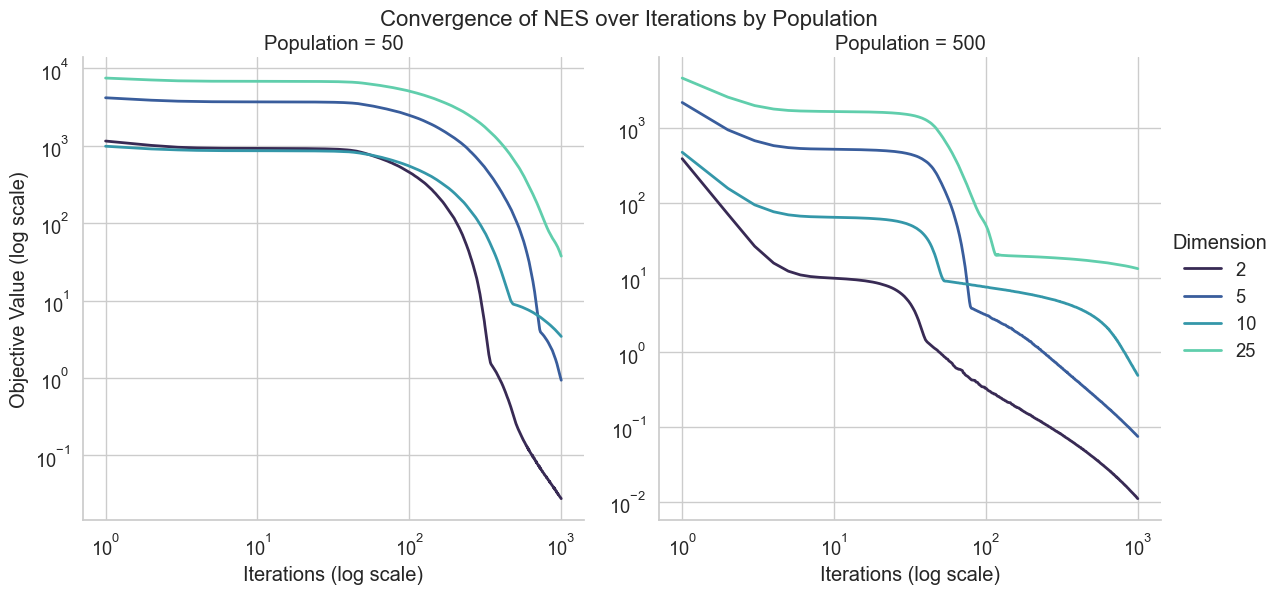

In [28]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for plotting
data = []
for (dim, pop), convergence in convergence_data.items():
    convergence = [-val for val in convergence]
    data.extend({"Iterations": i + 1, "Objective Value": value, "Dimension": dim, "Population": pop}
                for i, value in enumerate(convergence))

# Convert list to DataFrame
df = pd.DataFrame(data)

# Set context and style
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Plot with FacetGrid for population separation
g = sns.FacetGrid(df, col="Population", hue="Dimension", height=6, aspect=1, palette="mako", col_wrap=2, sharey=False)
g.map(sns.lineplot, "Iterations", "Objective Value", linewidth=2.0)

# Customize plot aesthetics
g.set(yscale="log", xscale="log")
g.set_axis_labels("Iterations (log scale)", "Objective Value (log scale)")
g.set_titles("Population = {col_name}")
g.add_legend(title="Dimension")

# Add a main title and show the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Convergence of NES over Iterations by Population", fontsize=16)
plt.show()


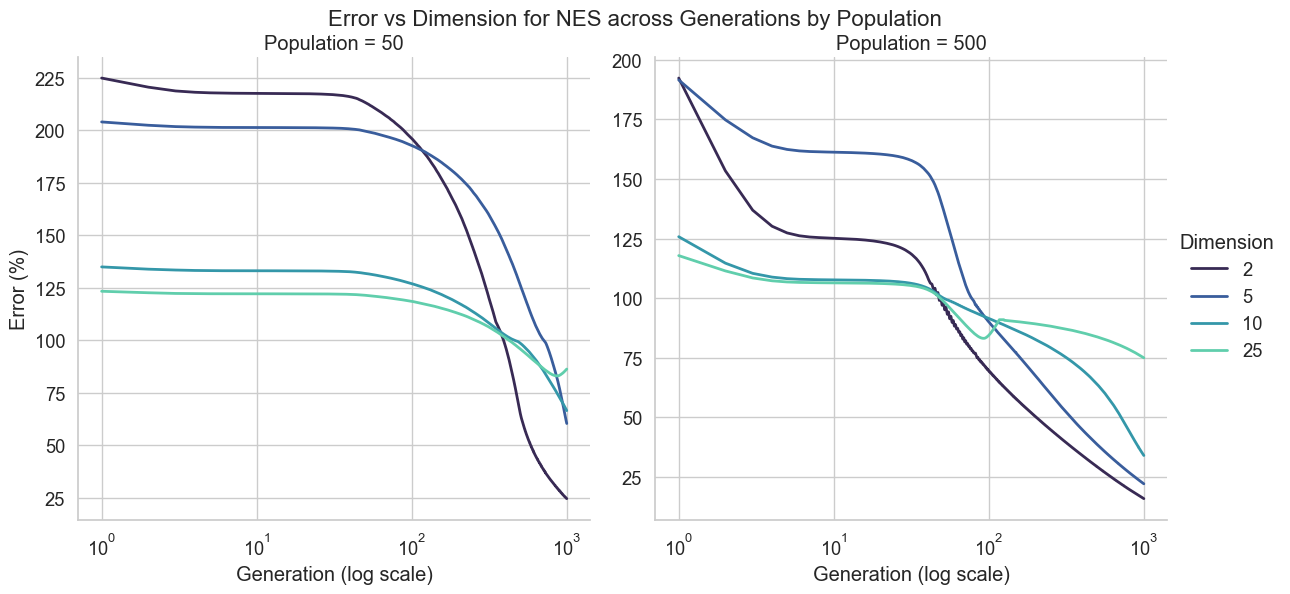

In [29]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for plotting
data = []
for (dim, pop), error in error_data.items():
    data.extend({"Generation": i + 1, "Error": 100*value, "Dimension": dim, "Population": pop}
                for i, value in enumerate(error))

# Convert list to DataFrame
df = pd.DataFrame(data)

# Set context and style for scientific plot aesthetics
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

# Plot with FacetGrid to separate by Population
g = sns.FacetGrid(df, col="Population", hue="Dimension", height=6, aspect=1, palette="mako", col_wrap=2, sharey=False)
g.map(sns.lineplot, "Generation", "Error", linewidth=2.0)

# Customize the plot
g.set(xscale="log")
g.set_axis_labels("Generation (log scale)", "Error (%)")
g.set_titles("Population = {col_name}")
g.add_legend(title="Dimension")

# Display plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Error vs Dimension for NES across Generations by Population", fontsize=16)
plt.show()
